# L9 Feature Engineering

This lesson will focus on a few aspects of Feature Engineering, which is similar to Data Wrangling. In particular, we're going to focus on the Feature Cross.

Also, we're going to look at a new data set that looks at subsample of NYC taxi rides taken from the NYC Taxi and Limosine Commission (https://www.nyc.gov/site/tlc/about/tlc-trip-record-data.page). This data set is part of Seaborn distributions, and can be loaded directly from Jupyter. You can find all of the other Seaborn provided data sets on github (https://github.com/mwaskom/seaborn-data).

Let's take a look!

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

c:\Users\SS\AppData\Local\Programs\Python\Python311\Lib\site-packages\scipy\__init__.py:169: UserWarning: A NumPy version >=1.18.5 and <1.26.0 is required for this version of SciPy (detected version 1.26.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
df = sns.load_dataset('taxis')
df.shape

(6433, 14)

In [3]:
df.head(5)

,pickup,dropoff,passengers,distance,fare,tip,tolls,total,color,payment,pickup_zone,dropoff_zone,pickup_borough,dropoff_borough
0,2019-03-23 20:21:09,2019-03-23 20:27:24,1,1.60,7.0,2.15,0.0,12.95,yellow,credit card,Lenox Hill West,UN/Turtle Bay South,Manhattan,Manhattan
1,2019-03-04 16:11:55,2019-03-04 16:19:00,1,0.79,5.0,0.00,0.0,9.30,yellow,cash,Upper West Side South,Upper West Side South,Manhattan,Manhattan
2,2019-03-27 17:53:01,2019-03-27 18:00:25,1,1.37,7.5,2.36,0.0,14.16,yellow,credit card,Alphabet City,West Village,Manhattan,Manhattan
3,2019-03-10 01:23:59,2019-03-10 01:49:51,1,7.70,27.0,6.15,0.0,36.95,yellow,credit card,Hudson Sq,Yorkville West,Manhattan,Manhattan
4,2019-03-30 13:27:42,2019-03-30 13:37:14,3,2.16,9.0,1.10,0.0,13.40,yellow,credit card,Midtown East,Yorkville West,Manhattan,Manhattan


Before we begin, you may like to explore this data set and get a feel for it.

## Feature Crosses

The Feature Cross is a broad category of feature engineering where you combine multiple features. Often this is numeric.

Since these are `datetime` objects, we'll have to convert them to seconds.

In [4]:
df.dtypes

pickup             datetime64[ns]
dropoff            datetime64[ns]
passengers                  int64
distance                  float64
fare                      float64
tip                       float64
tolls                     float64
total                     float64
color                      object
payment                    object
pickup_zone                object
dropoff_zone               object
pickup_borough             object
dropoff_borough            object
dtype: object

In [5]:
df['travel_time'] = (df['dropoff'] - df['pickup']).apply(lambda x: x.total_seconds())

Text(0.5, 0, 'Time time (s)')

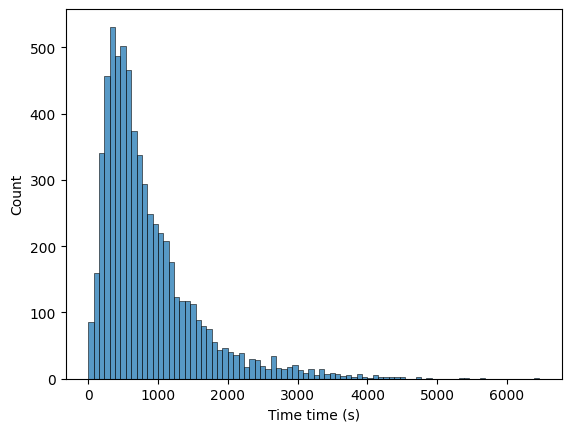

In [6]:
ax = sns.histplot(data=df, x='travel_time')
ax.set_xlabel('Time time (s)')

Now another thing we might like to do is see how this changes for different boroughs. But, customers can go between borough, so we really want to only look at those that start and stop in the same borough.

Here we create a simple `pd.Series` of `True`/`False` values if the pickup and droppoff boroughs are the same.

In [7]:
df['same_borough'] =  (df['dropoff_borough'] == df['pickup_borough'])

<Axes: xlabel='travel_time', ylabel='Count'>

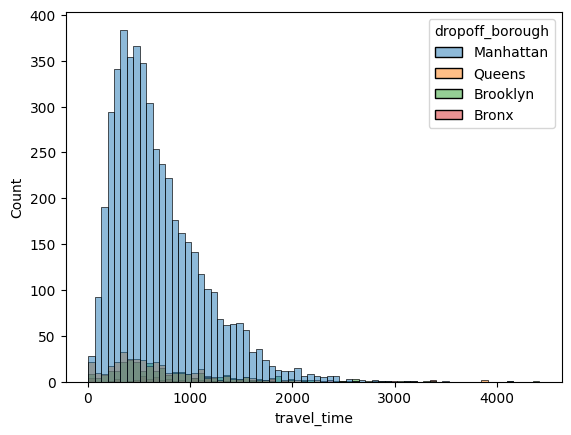

In [8]:
sns.histplot(data=df[df['same_borough'] == True], x='travel_time', hue='dropoff_borough')

Although I am not using this specific Feature Cross to draw conclusions, it helped me plot intra-borough travel times very quickly.

Also, we see we have a lot more trips in Manhattan, so we should probably look at relative frequencies between them.

<Axes: xlabel='travel_time', ylabel='Percent'>

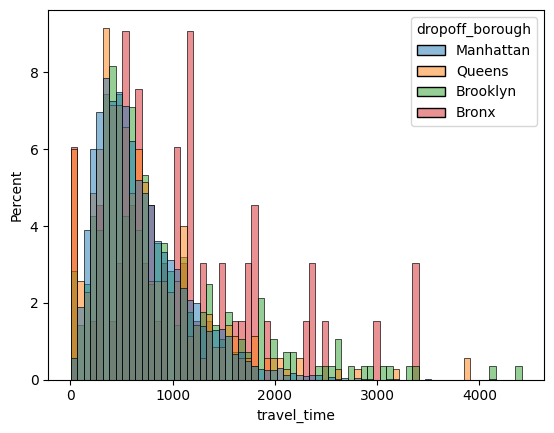

In [9]:
sns.histplot(data=df[df['same_borough'] == True], x='travel_time', hue='dropoff_borough',
            stat='percent', common_norm=False)

Lastly, another example of a feature cross is to numerically manipulate features. For instance, we might want to know if rides with multiple passengers have different costs. Or simply, what is the cost per passenger?

In [10]:
df.head(5)

,pickup,dropoff,passengers,distance,fare,tip,tolls,total,color,payment,pickup_zone,dropoff_zone,pickup_borough,dropoff_borough,travel_time,same_borough
0,2019-03-23 20:21:09,2019-03-23 20:27:24,1,1.60,7.0,2.15,0.0,12.95,yellow,credit card,Lenox Hill West,UN/Turtle Bay South,Manhattan,Manhattan,375.0,True
1,2019-03-04 16:11:55,2019-03-04 16:19:00,1,0.79,5.0,0.00,0.0,9.30,yellow,cash,Upper West Side South,Upper West Side South,Manhattan,Manhattan,425.0,True
2,2019-03-27 17:53:01,2019-03-27 18:00:25,1,1.37,7.5,2.36,0.0,14.16,yellow,credit card,Alphabet City,West Village,Manhattan,Manhattan,444.0,True
3,2019-03-10 01:23:59,2019-03-10 01:49:51,1,7.70,27.0,6.15,0.0,36.95,yellow,credit card,Hudson Sq,Yorkville West,Manhattan,Manhattan,1552.0,True
4,2019-03-30 13:27:42,2019-03-30 13:37:14,3,2.16,9.0,1.10,0.0,13.40,yellow,credit card,Midtown East,Yorkville West,Manhattan,Manhattan,572.0,True


In [11]:
df['cost_per_passenger'] = (df['total'] / df['passengers'])

<Axes: xlabel='cost_per_passenger', ylabel='Count'>

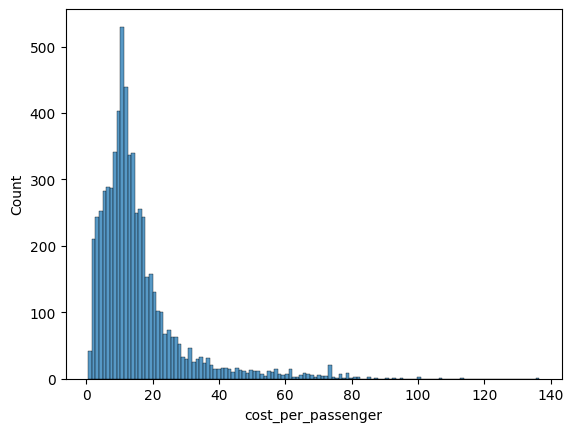

In [12]:
sns.histplot(data=df, x='cost_per_passenger')

Here we might also create a new feature specifying solo or multi passenger rides. I'll use a `lambda` function to quickly do this.

In [13]:
df['trip_type'] = df['passengers'].apply(lambda x: 'solo' if x == 1 else 'multi')

<Axes: xlabel='trip_type', ylabel='cost_per_passenger'>

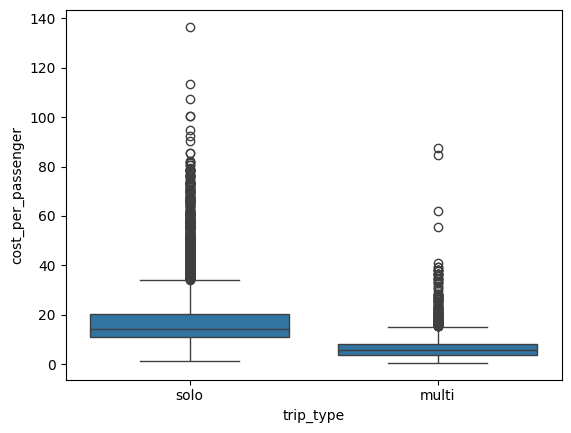

In [14]:
sns.boxplot(data=df, x='trip_type', y='cost_per_passenger', color='tab:blue')

Here we see that if you travel with friends, the total cost per person is advantageous.

## One Hot Encoding (OHE)

Finally I'd like to introduce OHE, which "binarizes" a categorical variable. This is useful in Machine Learning, and sometimes in data visualization.

To OHE features, you can use the `pd.get_dummies` method. If you don't specify a column(s), it will operate on _all_ categorical features.

For example, it expands our dataframe from 18 features to 423 columns!

In [15]:
df.head(5)

,pickup,dropoff,passengers,distance,fare,tip,tolls,total,color,payment,pickup_zone,dropoff_zone,pickup_borough,dropoff_borough,travel_time,same_borough,cost_per_passenger,trip_type
0,2019-03-23 20:21:09,2019-03-23 20:27:24,1,1.60,7.0,2.15,0.0,12.95,yellow,credit card,Lenox Hill West,UN/Turtle Bay South,Manhattan,Manhattan,375.0,True,12.950000,solo
1,2019-03-04 16:11:55,2019-03-04 16:19:00,1,0.79,5.0,0.00,0.0,9.30,yellow,cash,Upper West Side South,Upper West Side South,Manhattan,Manhattan,425.0,True,9.300000,solo
2,2019-03-27 17:53:01,2019-03-27 18:00:25,1,1.37,7.5,2.36,0.0,14.16,yellow,credit card,Alphabet City,West Village,Manhattan,Manhattan,444.0,True,14.160000,solo
3,2019-03-10 01:23:59,2019-03-10 01:49:51,1,7.70,27.0,6.15,0.0,36.95,yellow,credit card,Hudson Sq,Yorkville West,Manhattan,Manhattan,1552.0,True,36.950000,solo
4,2019-03-30 13:27:42,2019-03-30 13:37:14,3,2.16,9.0,1.10,0.0,13.40,yellow,credit card,Midtown East,Yorkville West,Manhattan,Manhattan,572.0,True,4.466667,multi


In [16]:
df.shape

(6433, 18)

In [17]:
pd.get_dummies(df).head(5)

,pickup,dropoff,passengers,distance,fare,tip,tolls,total,travel_time,same_borough,...,pickup_borough_Brooklyn,pickup_borough_Manhattan,pickup_borough_Queens,dropoff_borough_Bronx,dropoff_borough_Brooklyn,dropoff_borough_Manhattan,dropoff_borough_Queens,dropoff_borough_Staten Island,trip_type_multi,trip_type_solo
0,2019-03-23 20:21:09,2019-03-23 20:27:24,1,1.60,7.0,2.15,0.0,12.95,375.0,True,...,False,True,False,False,False,True,False,False,False,True
1,2019-03-04 16:11:55,2019-03-04 16:19:00,1,0.79,5.0,0.00,0.0,9.30,425.0,True,...,False,True,False,False,False,True,False,False,False,True
2,2019-03-27 17:53:01,2019-03-27 18:00:25,1,1.37,7.5,2.36,0.0,14.16,444.0,True,...,False,True,False,False,False,True,False,False,False,True
3,2019-03-10 01:23:59,2019-03-10 01:49:51,1,7.70,27.0,6.15,0.0,36.95,1552.0,True,...,False,True,False,False,False,True,False,False,False,True
4,2019-03-30 13:27:42,2019-03-30 13:37:14,3,2.16,9.0,1.10,0.0,13.40,572.0,True,...,False,True,False,False,False,True,False,False,True,False


If we specify the `payment` column, it expands to `payment_cash` and `payment_credit_card`.

In [18]:
pd.get_dummies(df, columns=['payment'])

,pickup,dropoff,passengers,distance,fare,tip,tolls,total,color,pickup_zone,dropoff_zone,pickup_borough,dropoff_borough,travel_time,same_borough,cost_per_passenger,trip_type,payment_cash,payment_credit card
0,2019-03-23 20:21:09,2019-03-23 20:27:24,1,1.60,7.0,2.15,0.0,12.95,yellow,Lenox Hill West,UN/Turtle Bay South,Manhattan,Manhattan,375.0,True,12.950000,solo,False,True
1,2019-03-04 16:11:55,2019-03-04 16:19:00,1,0.79,5.0,0.00,0.0,9.30,yellow,Upper West Side South,Upper West Side South,Manhattan,Manhattan,425.0,True,9.300000,solo,True,False
2,2019-03-27 17:53:01,2019-03-27 18:00:25,1,1.37,7.5,2.36,0.0,14.16,yellow,Alphabet City,West Village,Manhattan,Manhattan,444.0,True,14.160000,solo,False,True
3,2019-03-10 01:23:59,2019-03-10 01:49:51,1,7.70,27.0,6.15,0.0,36.95,yellow,Hudson Sq,Yorkville West,Manhattan,Manhattan,1552.0,True,36.950000,solo,False,True
4,2019-03-30 13:27:42,2019-03-30 13:37:14,3,2.16,9.0,1.10,0.0,13.40,yellow,Midtown East,Yorkville West,Manhattan,Manhattan,572.0,True,4.466667,multi,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6428,2019-03-31 09:51:53,2019-03-31 09:55:27,1,0.75,4.5,1.06,0.0,6.36,green,East Harlem North,Central Harlem North,Manhattan,Manhattan,214.0,True,6.360000,solo,False,True
6429,2019-03-31 17:38:00,2019-03-31 18:34:23,1,18.74,58.0,0.00,0.0,58.80,green,Jamaica,East Concourse/Concourse Village,Queens,Bronx,3383.0,False,58.800000,solo,False,True
6430,2019-03-23 22:55:18,2019-03-23 23:14:25,1,4.14,16.0,0.00,0.0,17.30,green,Crown Heights North,Bushwick North,Brooklyn,Brooklyn,1147.0,True,17.300000,solo,True,False
6431,2019-03-04 10:09:25,2019-03-04 10:14:29,1,1.12,6.0,0.00,0.0,6.80,green,East New York,East Flatbush/Remsen Village,Brooklyn,Brooklyn,304.0,True,6.800000,solo,False,True
